# BASICS 02 - One layer of HOTS in PyTorch

In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
import tonic, torch
from utils import timesurface, get_loader, get_dataset_info, plot_kernels, plot_weight_distribution
import matplotlib.pyplot as plt
from tqdm import tqdm
%cd ../hots
from layer import hotslayer

print(f' Tonic version installed -> {tonic.__version__}')

/home/antoine/homhots/hotsline/hots
 Tonic version installed -> 1.0.15


In [4]:
transform = tonic.transforms.NumpyAsType(int)
dataset = tonic.datasets.NMNIST(save_to='../../Data/', train=True, transform=transform)
loader = get_loader(dataset, shuffle=True)
#get_dataset_info(dataset, properties = ['time', 'mean_isi', 'nb_events']);

In [83]:
R = 4
ts_size = (2*R+1)
tau = 5e3#7e2

transform = tonic.transforms.Compose([tonic.transforms.ToTimesurface(sensor_size=dataset.sensor_size, tau=tau, decay='exp', surface_dimensions=(ts_size,ts_size))])
dataset = tonic.datasets.NMNIST(save_to='../../Data/', train=True, transform=transform)
loader = get_loader(dataset, shuffle=True, batch_size=None, kfold=600)

In [85]:
R = 4
n_pola = 2
ts_size = (2*R+1)**2*n_pola
n_neurons = 32
tau = 5e3#7e2
verbose = True

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
if verbose: print(f'device -> {device}')

torch.set_default_tensor_type("torch.DoubleTensor")

with torch.no_grad():
    output_pola = []
    layer = hotslayer(ts_size, n_neurons, device=device)
    #layer.learning_flag = False
    layer = layer.to(device)
    for events, target in tqdm(loader):
        
        n_star = layer(all_ts.to(device).squeeze(0))
        output_pola.append(n_star)
layer = layer.to("cpu")

device -> cuda


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [02:55<00:00,  1.76s/it]


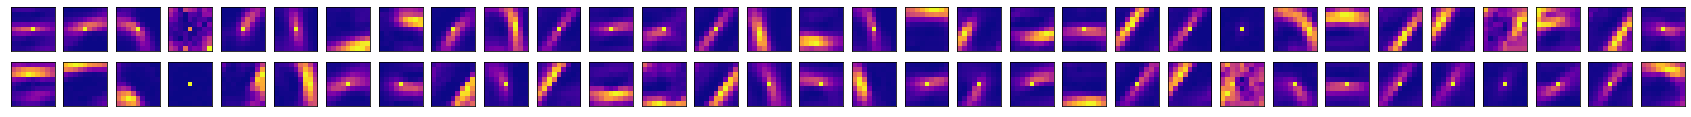

In [96]:
plot_kernels(layer, n_pola, R, width = 30)

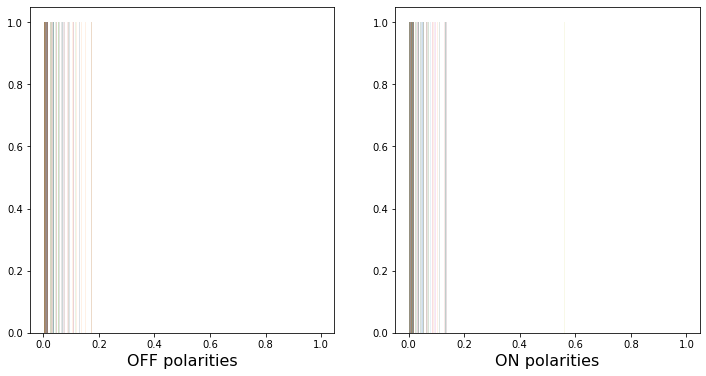

In [92]:
plot_weight_distribution(layer)